# Practice Keras

In [1]:
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Get the data I will use

In [2]:
#Get mnist data and split it into training set and test set
mnist = keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
print("The shape of the X_train", X_train.shape)
print("The shape of the Y_train", Y_train.shape)
print("The shape of the X_test", X_test.shape)
print("The shape of the Y_test", Y_test.shape)

The shape of the X_train (60000, 28, 28)
The shape of the Y_train (60000,)
The shape of the X_test (10000, 28, 28)
The shape of the Y_test (10000,)


# Prepare the data to train

In [3]:
#Reshape the data from 3dims tensor to 4 dims tendor
X_train = np.reshape(X_train, newshape = (60000, 28, 28, 1))
X_test = np.reshape(X_test, newshape = (10000, 28, 28, 1))

In [4]:
def one_hot(data): return to_categorical(data)

In [5]:
Y_train = one_hot(Y_train)
Y_test = one_hot(Y_test)

# Define a model I am going to train

In [6]:
def digitModel(input_shape):
    '''
    input_shape: (img_height, img_width, #channels)
    
    return: model object
    '''
    X_input = Input(input_shape)
    X = Conv2D(16, kernel_size = (3,3), strides = (1,1))(X_input)
    X = BatchNormalization()(X)
    X = MaxPooling2D(strides = 2)(X)
    X = Flatten()(X)
    X = Dense(10, activation = 'softmax')(X)
    model = Model(inputs = X_input, outputs = X)
    
    return model

In [7]:
model = digitModel((28, 28, 1))

# Train the model

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
train_history = model.fit(x = X_train, y = Y_train, batch_size = 256, epochs = 4, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 35s 644us/step - loss: 0.3423 - acc: 0.8951 - val_loss: 0.1500 - val_acc: 0.9585
Epoch 2/4
54000/54000 [==============================] - 32s 589us/step - loss: 0.1458 - acc: 0.9571 - val_loss: 0.1010 - val_acc: 0.9722
Epoch 3/4
54000/54000 [==============================] - 32s 586us/step - loss: 0.1025 - acc: 0.9707 - val_loss: 0.0913 - val_acc: 0.9727
Epoch 4/4
54000/54000 [==============================] - 33s 612us/step - loss: 0.0819 - acc: 0.9758 - val_loss: 0.0778 - val_acc: 0.9788


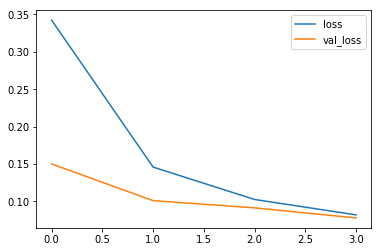

In [10]:
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### From this result, I can say that the model is still underfitting so that I could have train a couple of epochs more. At this time, my point is to practice writing code with Keras.

# Evaluate the model

In [11]:
preds = model.evaluate(x = X_test, y = Y_test)

10000/10000 [==============================] - 4s 438us/step


In [12]:
print(preds)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

[0.09743902552872896, 0.9716]

Loss = 0.09743902552872896
Test Accuracy = 0.9716
